In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from natsort import natsorted
# from xgboost import XGBClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import seaborn as sns

# Importando Dados

In [10]:
dataset = pd.read_csv('sample_data.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])
dataset.head()

,normal,ecg_duration,number_of_beats,mean_qrs_amplitude,standard_deviation_qrs_amplitude,mean_t_amplitude,standard_deviation_t_amplitude,mean_p_amplitude,standard_deviation_p_amplitude,mean_rr_interval,...,mean_pr_interval,standard_deviation_pr_interval,mean_qt_interval,standard_deviation_qt_interval,mean_pr_segment,standard_deviation_pr_segment,mean_st_deviation,standard_deviation_st_deviation,mean_heart_rate,standard_deviation_heart_rate
0,0,60.00,102,-0.39,0.92,-0.21,0.98,-0.29,0.96,0.59,...,-1.20,1.30,1.78,1.41,1.86,1.40,-0.92,0.39,106.53,17.34
1,1,30.00,39,-0.13,1.00,0.06,1.01,0.27,0.98,0.76,...,-0.53,0.64,1.21,0.71,1.39,0.67,0.05,1.01,98.21,72.29
2,1,12.47,18,0.67,0.77,0.38,0.96,0.43,0.94,0.69,...,0.06,0.27,0.52,0.25,0.72,0.26,-0.18,1.01,98.69,47.48
3,1,30.00,36,-0.33,0.96,0.39,0.93,0.33,0.96,0.81,...,-0.56,0.60,1.36,0.73,1.50,0.59,-0.26,0.98,73.73,2.28
4,1,33.77,46,1.00,0.00,0.62,0.79,-0.16,1.00,0.73,...,-0.71,0.69,1.45,0.79,1.57,0.66,-0.87,0.50,81.84,1.04


# Separando entre dados de Treino e Teste

In [13]:
data = dataset.copy()
y = data['normal']
x = data.drop(columns=['normal'])
x = x.infer_objects()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y)

# Estimativa da perfomance de alguns modelos

In [16]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████| 29/29 [00:16<00:00,  1.80it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.77,0.75,0.75,0.77,0.11
RandomForestClassifier,0.75,0.73,0.73,0.75,1.66
XGBClassifier,0.75,0.73,0.73,0.75,1.32
BaggingClassifier,0.74,0.73,0.73,0.74,0.65
AdaBoostClassifier,0.74,0.72,0.72,0.73,0.58
NuSVC,0.73,0.71,0.71,0.73,2.25
ExtraTreesClassifier,0.73,0.70,0.70,0.72,0.62
SVC,0.73,0.70,0.70,0.72,1.68
LinearSVC,0.70,0.67,0.67,0.69,0.53


# Construção do Modelo LGBM Classifier

In [100]:
clf = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
clf.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)], verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.449898	valid_0's binary_logloss: 0.50955
[40]	training's binary_logloss: 0.3868	valid_0's binary_logloss: 0.491835
[60]	training's binary_logloss: 0.347199	valid_0's binary_logloss: 0.491431
[80]	training's binary_logloss: 0.315923	valid_0's binary_logloss: 0.493175
[100]	training's binary_logloss: 0.28814	valid_0's binary_logloss: 0.495076


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [101]:
y_pred=clf.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

True Positives(TP) =  563
True Negatives(TN) =  1063
False Positives(FP) =  292
False Negatives(FN) =  195


<AxesSubplot: >

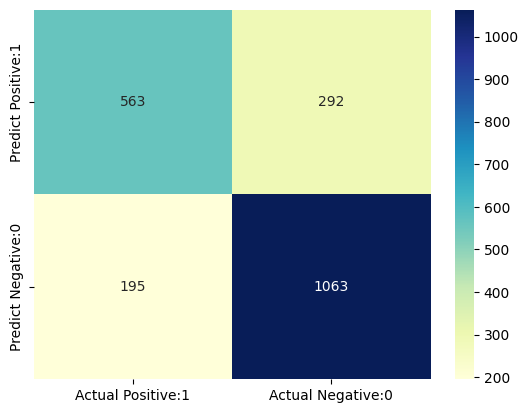

In [106]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       855
           1       0.78      0.84      0.81      1258

    accuracy                           0.77      2113
   macro avg       0.76      0.75      0.76      2113
weighted avg       0.77      0.77      0.77      2113



# Construção do Modelo de Random Forest

In [111]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

True Positives(TP) =  561
True Negatives(TN) =  1048
False Positives(FP) =  294
False Negatives(FN) =  210


<AxesSubplot: >

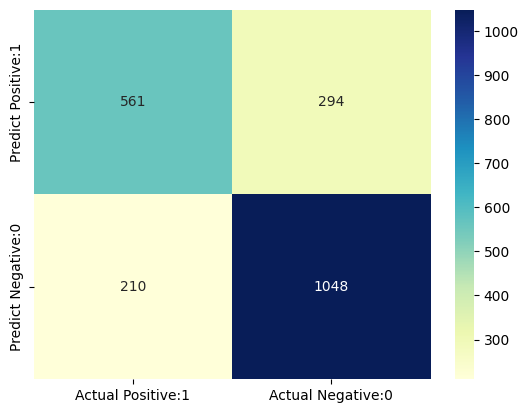

In [113]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       855
           1       0.78      0.83      0.81      1258

    accuracy                           0.76      2113
   macro avg       0.75      0.74      0.75      2113
weighted avg       0.76      0.76      0.76      2113

